## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **fileName** - .sql file path for the target plate(or a dataframe)
    -  **wellName** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **boxSize** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **repEnabled** - Representative flag 
        - True if you want representative cells
        - False if you want random cells 

#### Steps:

- Reading the target well from the input plate 
- For random: randomly select n cells from the input data
- For representative: Cluster the data to (100 - you can change this number) and pick the cluster 
  which is most similar to mean cluster
- Visualize  
  

In [ ]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import hdmedians as hd
from skfda import FDataGrid
from skfda.exploratory.stats import geometric_median
# from utils import read_data, visualize_data
from utils.read_data import *
from utils.visualize_data import *
from sklearn.cluster import KMeans
import time

### Inputs

In [96]:
fileName='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/\
workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/SQ00015195.sqlite'

n_cells=6

boxSize=100

wellName=["A10"]

# repEnabled= True
# how we select cells which can be 'random','representative','geometric_median'
cell_selection='geometric_median'

channels=["Mito","AGP","DNA","RNA","ER"]

In [7]:
# python restore_intelligent.py imaging-platform "projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/"

### Read single cell data

In [3]:
%%time
df_p_s0=readSingleCellData_sqlalch_well_subset(fileName,wellName);

time elapsed: 2.7157995899518332
(9, 658) [82, 83, 84, 85, 86, 87, 88, 89, 90]
time elapsed: 1.0628870050112407
CPU times: user 4.91 s, sys: 4.25 s, total: 9.16 s
Wall time: 3min 50s


In [94]:
%%time 

ps_arr=df_p_s[cp_features_analysis].values
gms=hd.medoid(ps_arr,axis=0)
gm_sample_ind=np.where(np.sum((ps_arr-gms),axis=1)==0)[0]
df_p_s_gm=df_p_s.loc[gm_sample_ind,:]

CPU times: user 294 ms, sys: 197 ms, total: 491 ms
Wall time: 490 ms


In [93]:
%%time

X = FDataGrid(df_p_s[cp_features_analysis].values)
gms2 = np.squeeze(geometric_median(X).data_matrix)
# gm2_sample_ind=np.where(np.sum((ps_arr-gms2),axis=1)==0)[0]
gm2_sample_ind=np.argmin(np.sum(abs(ps_arr-gms2),axis=1))
df_p_s_gm2=df_p_s.loc[gm2_sample_ind,:]

CPU times: user 404 ms, sys: 0 ns, total: 404 ms
Wall time: 396 ms


In [99]:
pd.concat([df_p_s_gm,df_p_s_gm],ignore_index=True)

,TableNumber,ImageNumber,ObjectNumber,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,...,PathName_OrigMito,FileName_OrigMito,PathName_OrigAGP,FileName_OrigAGP,PathName_OrigDNA,FileName_OrigDNA,PathName_OrigRNA,FileName_OrigRNA,PathName_OrigER,FileName_OrigER
0,462d41950cc36a7d0b570ad054c3eb0c,87,25,20095,1509.0,785.0,1.006634,0.349921,1.0,0.703606,...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch2sk1fk1fl1.png
1,462d41950cc36a7d0b570ad054c3eb0c,87,25,20095,1509.0,785.0,1.006634,0.349921,1.0,0.703606,...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c10f06p01-ch2sk1fk1fl1.png


### Visualize

<IPython.core.display.Javascript object>


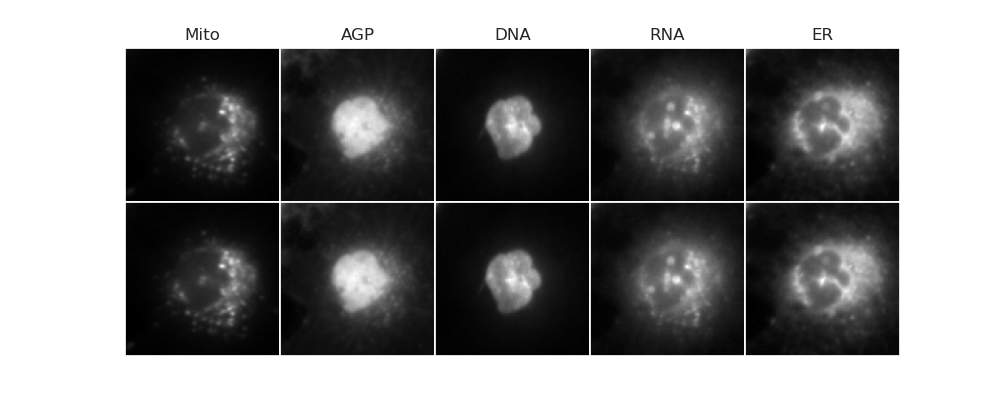

In [114]:
df_p_s=df_p_s0.copy()

images_dir="/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/"

for ch in channels:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Image_Metadata_Plate"].astype(str)
    df_p_s["FileName_Orig"+ch]=df_p_s["Image_FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png"))

cp_features, cp_features_analysis =  extract_feature_names(df_p_s);
    


if cell_selection=='random':
    dff=df_p_s.reset_index(drop=True).sample(n = n_cells, replace = False).reset_index(drop=True)
    
elif cell_selection=='representative': 
    n_cells_in_each_cluster_unif=30
    n_clusts=int(df_p_s0.shape[0]/n_cells_in_each_cluster_unif) 
    kmeans = KMeans(n_clusters=n_clusts).fit(df_p_s[cp_features_analysis].values)
    clusterLabels=kmeans.labels_
    df_p_s['clusterLabels']=clusterLabels;
    mean_clus=kmeans.predict(df_p_s[cp_features_analysis].mean().values[np.newaxis,])
    df_ps=df_p_s[df_p_s["clusterLabels"]==mean_clus[0]]
    dff=df_ps.reset_index(drop=True).sample(n = np.min([n_cells,df_ps.shape[0]]), replace = False).reset_index(drop=True)
    
elif cell_selection=='geometric_median':    
#     method 1
#     ps_arr=df_p_s[cp_features_analysis].values
#     gms=hd.medoid(ps_arr,axis=0)
#     gm_sample_ind=np.where(np.sum((ps_arr-gms),axis=1)==0)[0]
#     df_p_s_gm=df_p_s.loc[gm_sample_ind,:]
#     dff=pd.concat([df_p_s_gm,df_p_s_gm],ignore_index=True)
    
#     method 2
    ps_arr=df_p_s[cp_features_analysis].values
    X = FDataGrid(ps_arr)
    gms2 = np.squeeze(geometric_median(X).data_matrix)
    # gm2_sample_ind=np.where(np.sum((ps_arr-gms2),axis=1)==0)[0]
    gm2_sample_ind=np.array([np.argmin(np.sum(abs(ps_arr-gms2),axis=1))])
    df_p_s_gm2=df_p_s.loc[gm2_sample_ind,:]
    dff=pd.concat([df_p_s_gm2,df_p_s_gm2],ignore_index=True)
    
    
visualize_n_SingleCell(channels,dff,boxSize);

In [6]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/

2016_04_01_a549_48hr_batch1/             2017_12_05_Batch2/
2016_04_01_a549_48hr_batch1_compressed/  workspace/


In [110]:
gm_sample_ind

array([155])

In [5]:
median

FDataGrid(
    array([[[1. ],
            [1. ],
            [3. ],
            [0.5]]]),
    grid_points=(array([0.        , 0.33333333, 0.66666667, 1.        ]),),
    domain_range=((0.0, 1.0),),
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None,
    interpolation=SplineInterpolation(interpolation_order=1, smoothness_parameter=0, monotone=False))